## __Midterm Project: Dida 325__
#### By: Michael Niero

Loading in the needed libraries for this project:

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Loading in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) and naming it `voters`. The data's origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [122]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")
voters

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


## __Introduction__

__Purpose of the Project:__
This project aims to analyze and visualize voter registration data across the United States, with a focus on understanding both national and state-level trends in voter registration in 2016 and 2020. By evaluating this data, we can gain insights into the trends of voter registration growth, seasonal patterns, and regional variations in the United States.

__Goal:__
The goal of this project is to answer two specific research questions related to voter registration in the U.S. The first question looks at the national trend of voter registrations comparing two different years, while the second question zooms into a particular state to understand how individual jurisdictions are performing in terms of voter registration.

__Why It’s Important:__
Voter registration is important for democracy. By looking at trends in voter registration, we can help governments, political campaigns, and advocacy groups focus on areas where they can make the most impact. Understanding this data can also help improve voting turnout and make the voting process better for everyone.

__Research Questions:__

Question 1: How did the total number of new voter registrations in the U.S. change from 2016 to 2020? (National)

Question 2: Which jurisdiction had the highest amount of new registered voters? (State)



 ## __Data Processing__


We are going to look at the first 5 rows of the dataframe to get a better understanding of the data, focusing on the names of the columns.

In [123]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


The variables in the data frame are Juristiction, Year, Month, and New registered voters. In the dataframe, the Jurisdiction variable represents the geographic area or region, such as a state or county, where the voter registration data is collected. The Year variable indicates the year in which the data was recorded. The Month variable specifies the month when the voter registration occurred and lastly, the New Registered Voters variable shows the number of new individuals who registered to vote within the given jurisdiction, year, and month.

Checking for any missing data data.

In [124]:
voters.isnull().count()

,0
Jurisdiction,106
Year,106
Month,106
New registered voters,106


We see that that the count is zero for all variables so there is no missing data.

Checking the data types:



In [125]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


We are going to rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook.

In [126]:
voters = voters.rename(columns={"Jurisdiction": "NAME", "New registered voters": "registered_voters"})
voters

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


## __Potential Limitations of our Data__

From observation, there is incomplete monthly data as some jurisdictions have data for only 4 months, while others have 5. This suggests that not all months are accounted for in the first place and may lead to an inaccurate representation of voter registration trends over time. If key months are missing—especially those close to major election deadlines—it could skew the results.

Another observation is that not all jurisdictions appear to be included in the dataset. This means the analysis may not fully represent voter registration trends across the entire U.S. Some states or regions may be underrepresented, leading to biased conclusions about national trends.

## __Exploratory Data Analysis__

We will show the state, month, year, and number of registered voters when the highest amount of new registered voters occurred.


In [127]:
voters.loc[voters['registered_voters'].idxmax()]

,13
NAME,California
Year,2020
Month,Feb
registered_voters,238281


The highest amount of new voter registration was in California in February 2020, with 238,281 new registered voters.

What is the average voter registration?

In [128]:
voters['registered_voters'].mean()

48223.46226415094

We find the average of average voter registration by taking the mean (using the mean function) of the registered_voters column in the voters dataframe and we find the average is 48223.46226415094. So rounding down to the nearest number would give us approximately an average of 48223.

We are going to create a dataframe called "high_voters" showing only the times where voter registration was higher than the average above and how many times it happened.


In [131]:
average_voter_registration = voters['registered_voters'].mean()

high_voters = voters[voters['registered_voters'] > average_voter_registration]

high_voters_count = len(high_voters) #len returns the number of items in an object (in this case high_voters)

print(high_voters_count)

36


Using the average we got from before, we can compare the times in which the number of new registered voters was above the average and we use the length method to count how many times that happened. We see once it is printed that it happens 36 times.

We will look at how many times each state went above the national average for new voter registration:



In [133]:
# Count occurrences for each state
state_high_counts = high_voters['NAME'].value_counts()

print(state_high_counts)


NAME
Texas             8
California        7
Florida           7
North Carolina    6
Illinois          4
Arizona           3
Georgia           1
Name: count, dtype: int64


Since high_voters is a dataframe itself and has the same variables as voters, we can use it's NAME column and value counts to determine how many times each state was over the national average for new voter registration.

We wil determine which three states had the highest average voter registration overall.

In [135]:
# Calculate the average voter registration per state
state_avg_voter_reg = voters.groupby('NAME')['registered_voters'].mean()

# Sort the states by average voter registration in descending order and take the top 3
top_three_states = state_avg_voter_reg.sort_values(ascending=False).head(3)

print(top_three_states)


NAME
California    144545.375
Texas         114610.100
Florida        65868.125
Name: registered_voters, dtype: float64


## __Data Visualization__

We are going to create a plot showing the voter registratation by state:

<ipython-input-136-826f08739b0a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NAME', y='registered_voters', data=state_total_voters, palette="magma")


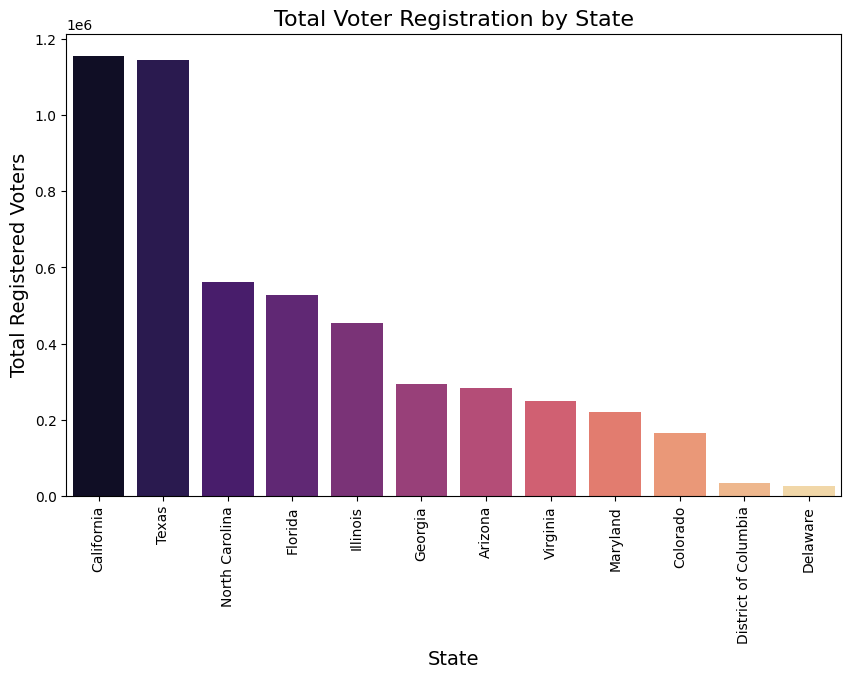

In [136]:

state_total_voters = voters.groupby('NAME')['registered_voters'].sum().reset_index()

state_total_voters = state_total_voters.sort_values(by='registered_voters', ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(x='NAME', y='registered_voters', data=state_total_voters, palette="magma")

plt.xticks(rotation=90)

plt.xlabel('State', fontsize=14)
plt.ylabel('Total Registered Voters', fontsize=14)
plt.title('Total Voter Registration by State', fontsize=16)

plt.show()


Now we will produce a plot comparing voter registation in 2016 and 2020 by month:

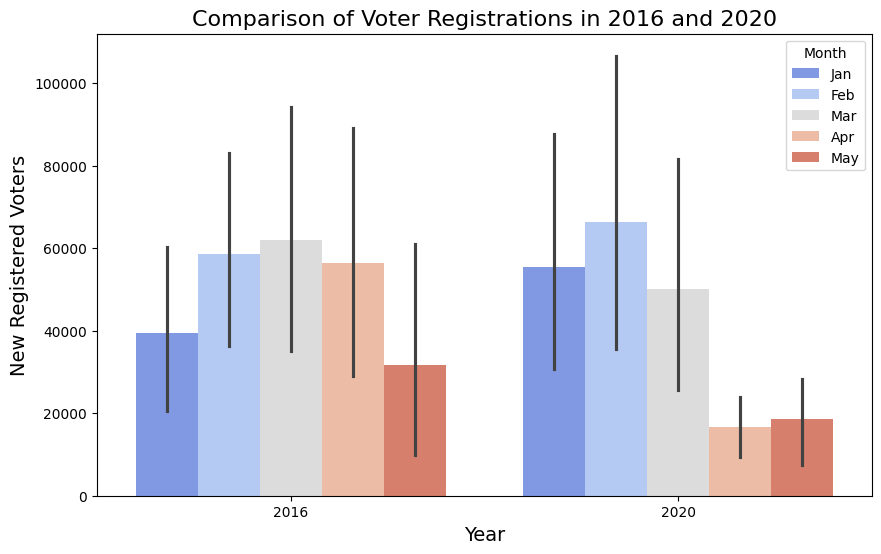

In [139]:
plt.figure(figsize=(10, 6))

# Create bar plot with color based on month
sns.barplot(x="Year", y="registered_voters", data=voters, hue="Month", palette="coolwarm")

plt.xlabel("Year", fontsize=14)
plt.ylabel("New Registered Voters", fontsize=14)
plt.title("Comparison of Voter Registrations in 2016 and 2020", fontsize=16)

plt.show()



## __National level research question:__
### __How did dthe total number of new voter registrations in the U.S. changed from 2016 to 2020?__

The previous visualization did a good job at showing the number of new registered voters there were in months January through May for the years 2016 and 2020 respectively. However, just looking at this graph makes us unable to see the the difference in total difference of new registered voters in 2016 vs. 2020. To to this we must add together all of the voters for each year respectively.




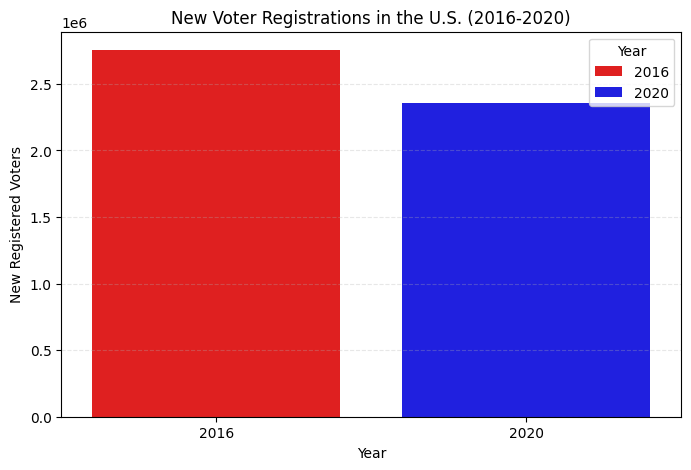

In [89]:
# Filter the data for 2016 to 2020
filtered_data = voters[(voters["Year"] >= 2016) & (voters["Year"] <= 2020)]

# Group by Year and sum new registered voters
yearly_registrations = filtered_data.groupby("Year")["registered_voters"].sum().reset_index()

# Set the figure size
plt.figure(figsize=(8, 5))


# Create the bar plot with seaborn, coloring by Year
sns.barplot(x="Year", y="registered_voters", data=yearly_registrations, hue= "Year", palette={2016: "red", 2020: "blue"})

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("New Registered Voters")
plt.title("New Voter Registrations in the U.S. (2016-2020)")
plt.xticks(rotation=0)  # Keeps the year labels horizontal
plt.grid(axis="y", linestyle="--", alpha=0.3)

# Show the plot
plt.show()


Now that we have done the totals for each years, we can see that there was a slight decrease nationally frmo 2016 to 2020.

## __Mapping__

We first need to load in our file from the mapping unit:

In [140]:
!git clone https://github.com/SFord87/325-Datasets

fatal: destination path '325-Datasets' already exists and is not an empty directory.


In [141]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

We will set our continental US bounding box:

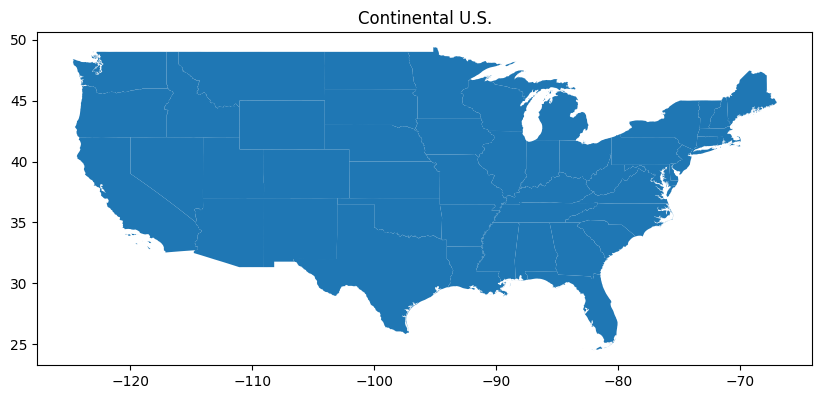

In [142]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

bbox.plot(figsize=(10, 10))
plt.title("Continental U.S.")
plt.show()

Now we will create a dataframe that shows the average voter registration per state

In [143]:
# Group by state (NAME) and calculate the average of registered_voters
avg_voter_registration = voters.groupby("NAME")["registered_voters"].mean().reset_index()

avg_voter_registration.head()  # Shows the first few rows of the dataframe


,NAME,registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400


We will merge the above dataframe results with the mapping dataand use `inner` for the `how` argument.

In [144]:
# Merge the avg_voter_registration dataframe with the states GeoDataFrame using inner join
merged_data = states.merge(avg_voter_registration, on="NAME", how="inner")

# Display the first few rows of the merged dataframe
merged_data.head()


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375


Now we will make our map:

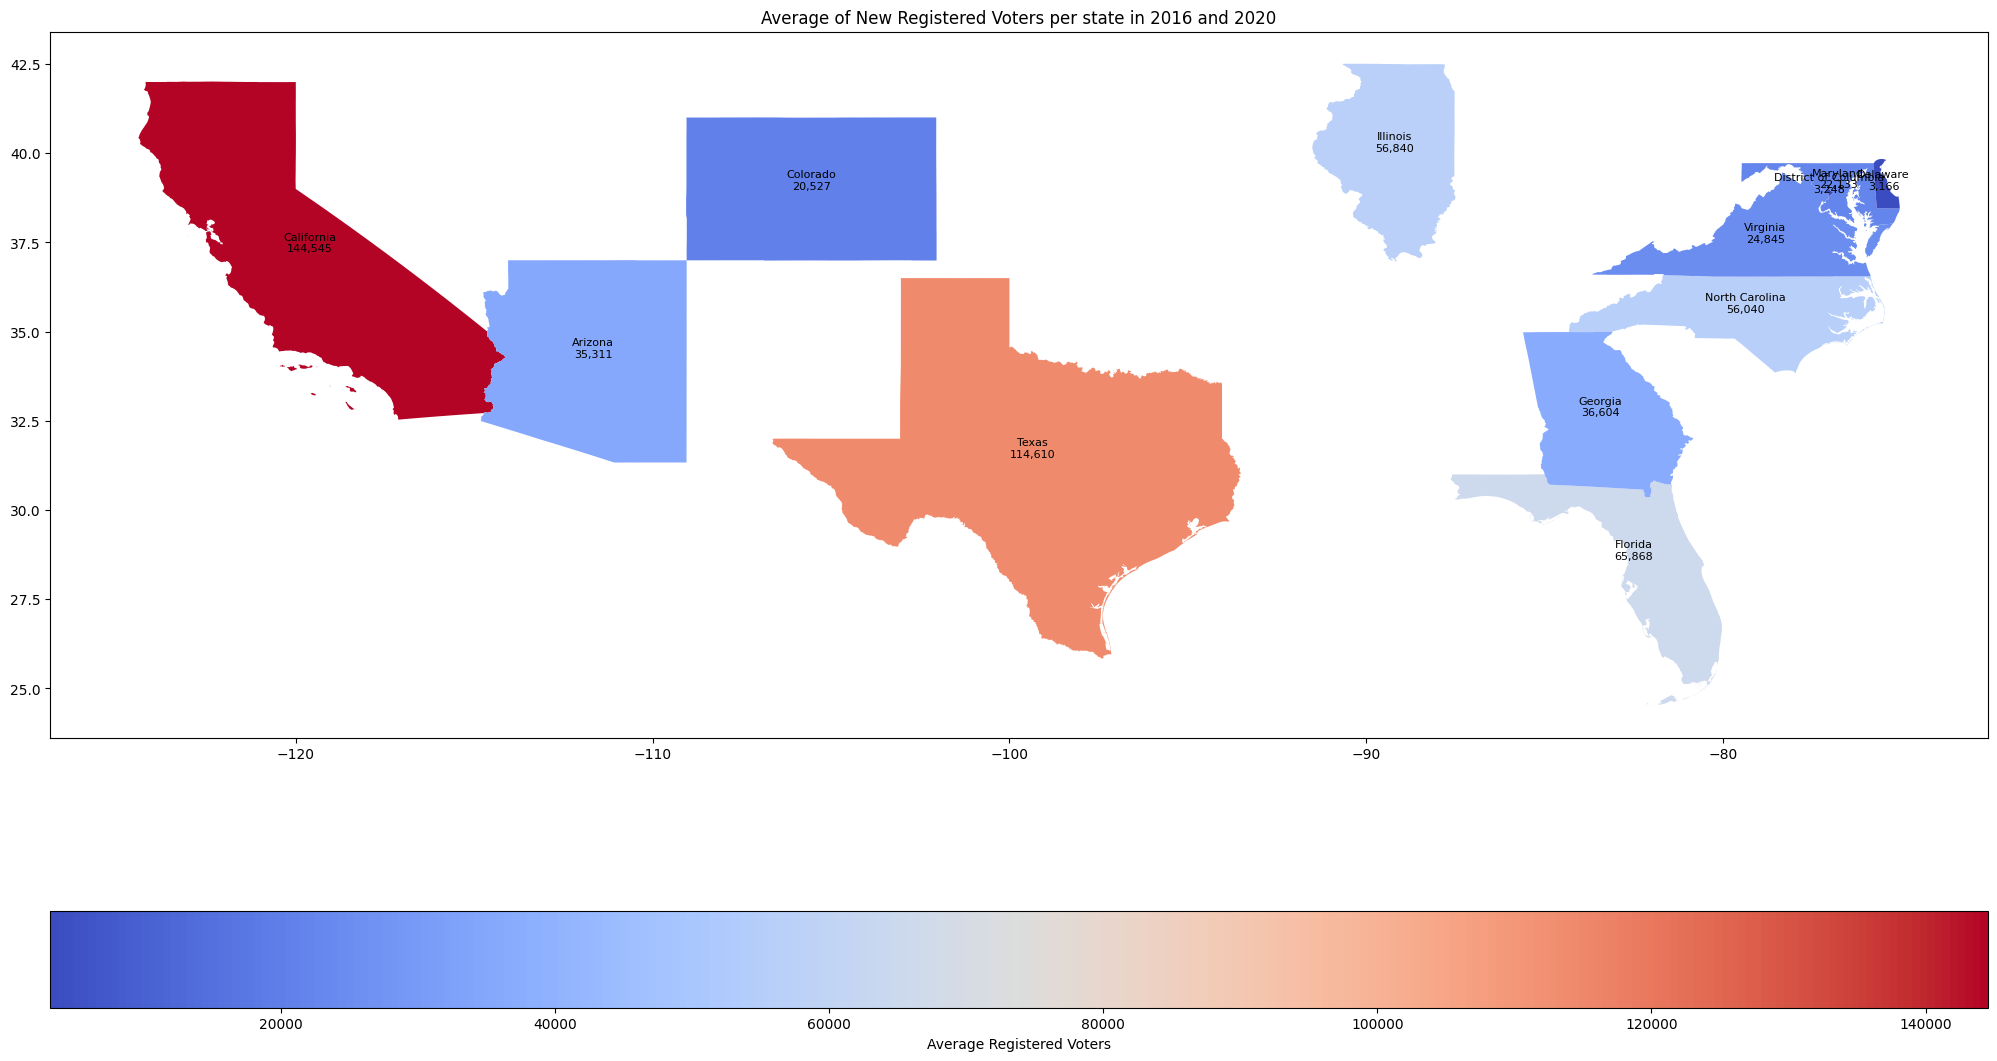

In [145]:
fig = plt.figure(1, figsize=(25, 15))
ax = fig.add_subplot()

# Plot the merged data with voter registration info highlighted using a color map
merged_data.plot(column="registered_voters", ax=ax, legend=True, cmap="coolwarm",
                 legend_kwds={"label": "Average Registered Voters",
                              "orientation": "horizontal"})

# Annotate the map with state names and average registered voters
merged_data.apply(lambda x: ax.annotate(
    text=f"{x.NAME}\n{int(x['registered_voters']):,}",
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),
    ha="center", fontsize=8), axis=1)

plt.title("Average of New Registered Voters per state in 2016 and 2020")
# Display the plot
plt.show()


## __Conclusion__

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


__Insights:__

Based off of the data used in this notebook, we learned how to compare the data of new registered voters in 2016 vs. 2020 based off of the juristiction and month. We were to answer both research questions as we compared 2016 new registered voters by month and the total average new voters. In conclusion, our finding were successfully backed up by proper calculations and graphs.

__Suggestions:__

I would warn my client that this data is promising but it does not fully capture national trends as we see that there was vital data missing. Not all juristictions were represented in our data. Also not all of the months of the year were accounted for. This could throw off the trends and conclusions we made based off of the data that we had.


__Possible next steps:__

If i were to continue working on this project I would definitely look into fulfilling all of the data. With that, you can make the proper conclusions on national and state yearly trends. Also I would expand the years to possibly account for non-election years or just election years prior to the ones taht were given to give us an even better picture.

## __Github__

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [ ]:
Michael Niero